In [1]:
##Import modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
##Read the training and test set files, save the Id columns and remove them from the datasets
train = pd.read_csv("C:\\Users\\Vadim_Katsemba\\Downloads\\train.csv")
test = pd.read_csv("C:\\Users\\Vadim_Katsemba\\Downloads\\test.csv")

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [3]:
##Observe the training set
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##Observe the test set
test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


C:\Users\Vadim_Katsemba\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



1.8828757597682129     6.536281860064529


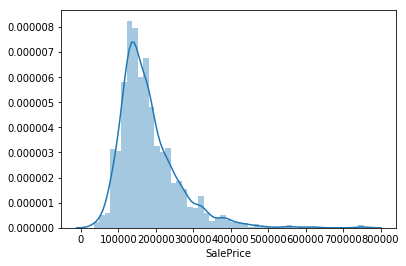

In [5]:
##Plot the distribution of the Sale Price and observe the skew and kurtosis
from scipy.stats import skew, kurtosis
sns.distplot(train['SalePrice']);
print(train["SalePrice"].skew(),"   ", train["SalePrice"].kurtosis())

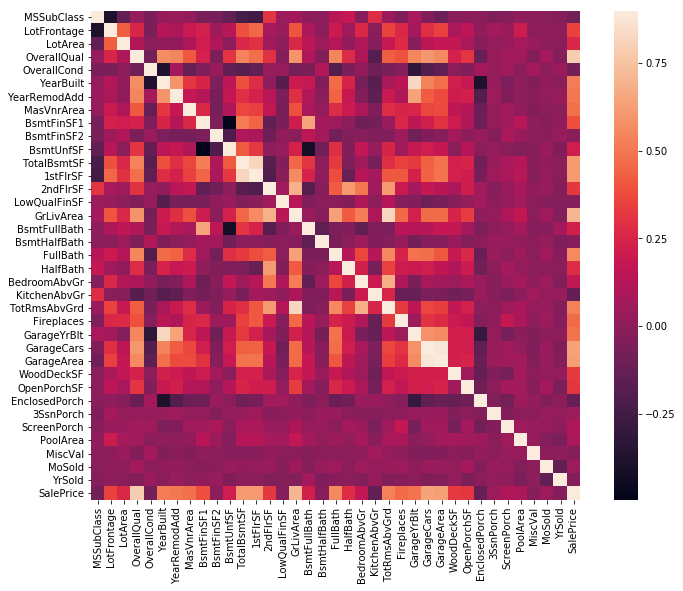

In [6]:
##Generate a correlation matrix for all variables
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

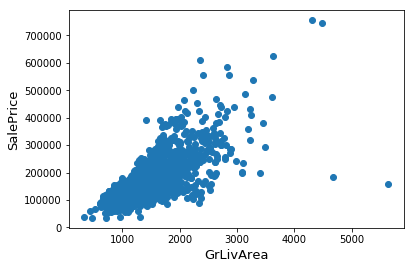

In [7]:
##Scatter plot the GrLivArea vs SalePrice
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

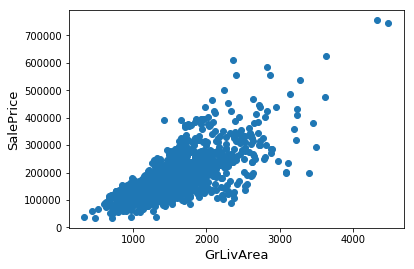

In [8]:
##Remove the outliers and show the new scatterplot
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

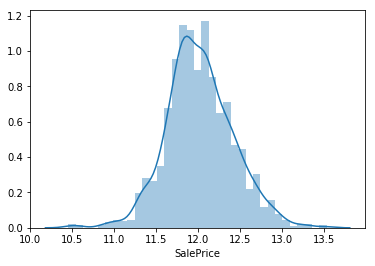

In [9]:
##Take the log of the Sale Price in order to center the distribution
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice']);

In [10]:
##Check the skew and kurtosis after the log scale
print(train["SalePrice"].skew(),"  ", train["SalePrice"].kurtosis())

0.12157976050304882    0.8047507917418972


In [11]:
##Plot the variables most correlated to SalePrice in descending order
corr = train.corrwith(train['SalePrice']).abs().sort_values(ascending=False)[2:]

data = go.Bar(x=corr.index, 
              y=corr.values )
       
layout = go.Layout(title = 'Which variables are most correlated to Sale Price?', 
                   xaxis = dict(title = ''), 
                   yaxis = dict(title = 'correlation'),
                   autosize=False, width=750, height=500,)

fig = dict(data = [data], layout = layout)
iplot(fig)

In [12]:
##Plot the variables most correlated to SalePrice Log in descending order
corr = train.corrwith(train['SalePrice']).abs().sort_values(ascending=False)[2:]

data = go.Bar(x=corr.index, 
              y=corr.values )
       
layout = go.Layout(title = 'Which variables are most correlated to Sale Price Log?', 
                   xaxis = dict(title = ''), 
                   yaxis = dict(title = 'correlation'),
                   autosize=False, width=750, height=500,)

fig = dict(data = [data], layout = layout)
iplot(fig)

In [13]:
##Merge the two datasets
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [14]:
##Calculate the percentage of missing values in the dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

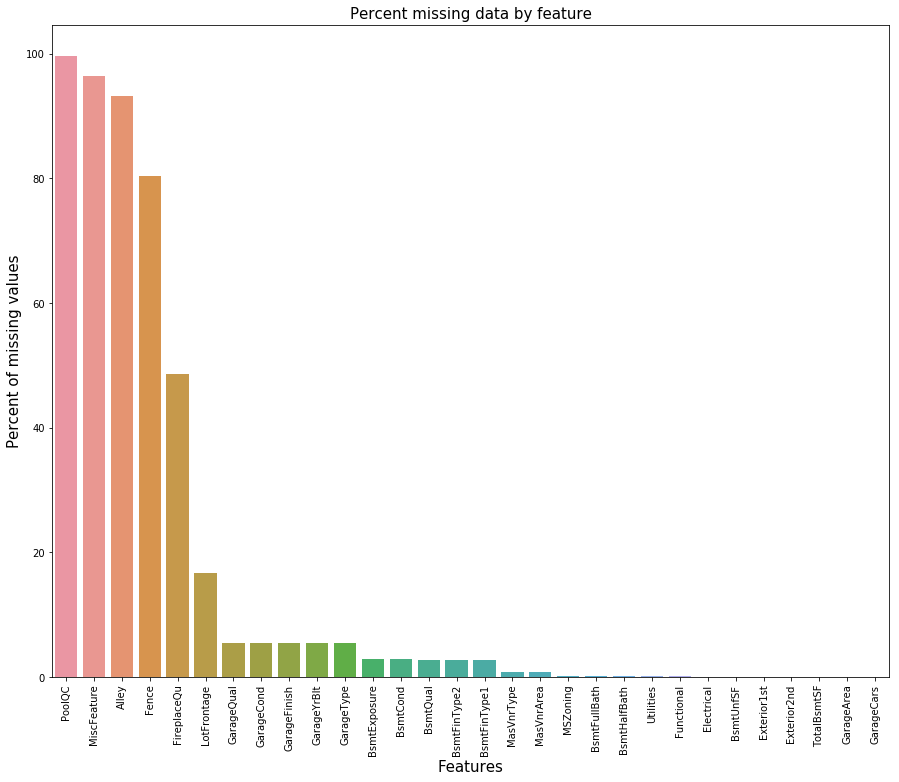

In [15]:
##Plot the features by their missing data percentages in descending order
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [16]:
##Replace missing values
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [17]:
##Check if any missing values still exist
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [18]:
##Modify data types by converting them into strings
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [19]:
##Encode labels
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [20]:
##Get dummy variables and split the merged data into training and test sets
all_data = pd.get_dummies(all_data)

train = all_data[:ntrain]
test = all_data[ntrain:]

In [21]:
##Import sklearn libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [24]:
##Create validation function with 5-fold validation
def rmsle(model):
    kfold = KFold(5, shuffle = True, random_state = 1).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring = "neg_mean_squared_error", cv = kfold))
    return(rmse)

In [26]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree = 2, coef0 = 2.5)
KRR_score = rmsle(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(KRR_score.mean(), KRR_score.std()))

C:\Users\Vadim_Katsemba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.824071e-19

C:\Users\Vadim_Katsemba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.180118e-18

C:\Users\Vadim_Katsemba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.234617e-19



Kernel Ridge score: 0.8326 (0.2801)



C:\Users\Vadim_Katsemba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.362902e-19

C:\Users\Vadim_Katsemba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.385006e-19



In [27]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))
lasso_score = rmsle(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(lasso_score.mean(), lasso_score.std()))

Lasso score: 0.1128 (0.0069)



In [28]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=1))
ENet_score = rmsle(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(ENet_score.mean(), ENet_score.std()))

ElasticNet score: 0.1128 (0.0070)



In [29]:
GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = 1)
GBoost_score = rmsle(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(GBoost_score.mean(), GBoost_score.std()))

Gradient Boosting score: 0.1153 (0.0071)



In [30]:
LassoMd = lasso.fit(train.values,y_train)
ENetMd = ENet.fit(train.values,y_train)
GBoostMd = GBoost.fit(train.values,y_train)

In [31]:
final_model = (np.expm1(LassoMd.predict(test.values)) + np.expm1(ENetMd.predict(test.values)) + np.expm1(GBoostMd.predict(test.values)) ) / 3

In [32]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = final_model
submission.to_csv('submission.csv',index=False)